In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

resolution = 10  # pixels/um

sx = 16  # size of cell in X direction
sy = 16  # size of cell in Y direction
cell = mp.Vector3(sx, sy, 0)

dpml = 1.0
pml_layers = [mp.PML(dpml)]
resolution = 10

In [2]:
from meep import materials

In [3]:
pad = 4 # Pad distance between waveguide and cell edge
w = 1 # width of waveguide, micrometers

In [4]:
wavelength = w * 430.501 / 538.126

In [5]:
fcen = 1/wavelength
df = fcen * .1

sources = [
    mp.Source(
        mp.GaussianSource(fcen, fwidth=df),
        component=mp.Ez,
        center=mp.Vector3(-0.5 * sx + dpml, 0, 0),
        size=mp.Vector3(0,w,0)
    )
]

/home/tornikeo/miniconda3/envs/vortex/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/tornikeo/miniconda3/envs/vortex/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


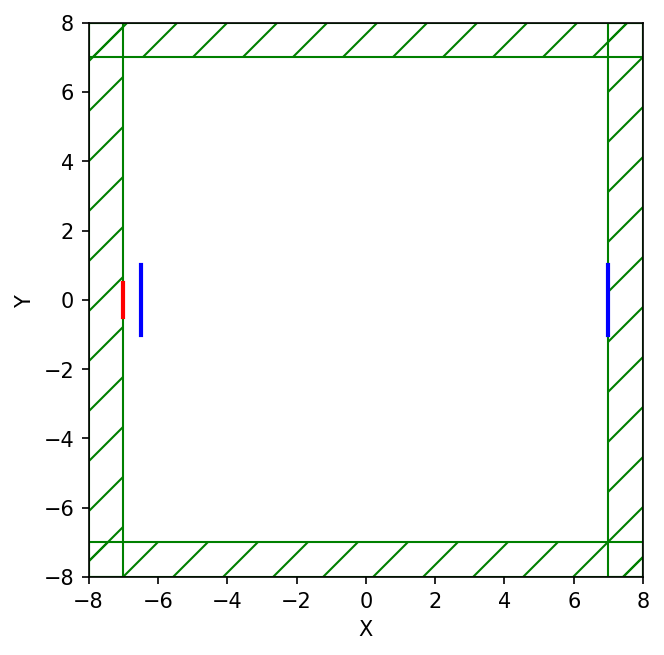

In [6]:
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=[],
    sources=sources,
    resolution=resolution,
)

nfreq = 100

# Reflected flux
refl_fr = mp.FluxRegion(
    center=mp.Vector3(-0.5*sx + dpml + 0.5, 0, 0),
    size=mp.Vector3(0, 2*w, 0)
)

refl = sim.add_flux(fcen, df, nfreq, refl_fr)

tran_fr = mp.FluxRegion(
    center=mp.Vector3(0.5 * sx - dpml, 0, 0),
    size=mp.Vector3(0, 2 * w, 0)
)

tran = sim.add_flux(fcen, df, nfreq, tran_fr)
plt.figure(dpi=150,)
sim.plot2D()
plt.show();

In [ ]:
import time

pt = mp.Vector3(0.5 * sx - dpml - 0.5, 0)

f = plt.figure(dpi=150)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(
    mp.at_every(10, Animate),
    until_after_sources = mp.stop_when_fields_decayed(
        dt=50, c=mp.Ez, pt=pt, decay_by=1e-3,)
)
plt.close()
!mkdir -p media
filename = f'media/{time.strftime("%Y%m%d-%H%M%S")}.mp4'
fps = 10
Animate.to_mp4(fps, filename)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00165105 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 200
time for set_epsilon = 8.66781 s
-----------
on time step 38 (time=0.095), 0.105574 s/step
on time step 105 (time=0.2625), 0.0598022 s/step
on time step 165 (time=0.4125), 0.0670817 s/step
on time step 220 (time=0.55), 0.0732158 s/step
on time step 278 (time=0.695), 0.0697593 s/step
on time step 336 (time=0.84), 0.0698007 s/step
on time step 395 (time=0.9875), 0.0683708 s/step
on time step 452 (time=1.13), 0.0707967 s/step
on time step 519 (time=1.2975), 0.060304 s/step
on time step 594 (time=1.485), 0.0539513 s/step
on time step 669 (time=1.6725), 0.0537661 s/step
on time step 744 (time=1.86), 0.0537326 s/step
on time step 818 (time=2.045), 0.0542653 s/step
on time step 893 (time=2.2325), 0.0539868 s/step
on time step 968 (time=2.42), 0.0536864 s/step
on time step 1043 (time=2.6075), 0.0539042 s/step
on time step 1118 (time=

KeyboardInterrupt: 

In [ ]:
from IPython.display import Video
Video(filename)

In [ ]:
straight_refl_data = sim.get_flux_data(refl)

In [ ]:
straight_tran_flux = mp.get_fluxes(tran)

In [ ]:
sim.reset_meep()
geometry = [
    mp.Cylinder(
        radius=w,
        center=mp.Vector3(0,0,0),
        material=mp.Medium(epsilon=6)
    )
]

sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)

# reflected flux
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

# tran_fr = mp.FluxRegion(
#     center=mp.Vector3(wvg_xcen, 0.5 * sy - dpml - 0.5, 0), size=mp.Vector3(2 * w, 0, 0)
# )
# tran = sim.add_flux(fcen, df, nfreq, tran_fr)

tran_fr = mp.FluxRegion(
    center=mp.Vector3(0.5 * sx - dpml, 0, 0),
    size=mp.Vector3(0, 2 * w, 0)
)
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

# for normal run, load negated fields to subtract incident from refl. fields
sim.load_minus_flux_data(refl, straight_refl_data)

# pt = mp.Vector3(wvg_xcen, 0.5 * sy - dpml - 0.5)
pt = mp.Vector3(0.5 * sx - dpml - 0.5, 0)

plt.figure(dpi=150,)
sim.plot2D()
plt.show();

In [ ]:
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(
    mp.at_every(10, Animate),
    until_after_sources = mp.stop_when_fields_decayed(
        dt=50, c=mp.Ez, pt=pt, decay_by=1e-3,)
)
plt.close()
!mkdir -p media
filename = f'media/{time.strftime("%Y%m%d-%H%M%S")}.mp4'
fps = 10
Animate.to_mp4(fps, filename)

bend_refl_flux = mp.get_fluxes(refl)
bend_tran_flux = mp.get_fluxes(tran)

flux_freqs = mp.get_flux_freqs(refl)

In [ ]:
Video(filename)

In [ ]:
wl = []
Rs = []
Ts = []

for i in range(nfreq):
    wl = np.append(wl, 1 / flux_freqs[i])
    Rs = np.append(Rs, -bend_refl_flux[i] / straight_tran_flux[i])
    Ts = np.append(Ts, bend_tran_flux[i] / straight_tran_flux[i])
    

if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl, Rs, "bo-", label="reflectance")
    plt.plot(wl, Ts, "ro-", label="transmittance")
    plt.plot(wl, 1 - Rs - Ts, "go-", label="loss")
#     plt.axis([5.0, 10.0, 0, 1])
    plt.ylim([0,1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()